In [1]:
import pynq
from pynq import Overlay
from pynq import DefaultIP
from pynq import MMIO
import time
from operator import*
import matplotlib.pyplot as plt

# Load the SPI overlay
ol = Overlay("pmod_ad1.bit")
ol.download()

In [2]:
ad1_ip = ol.PmodAD1_0

In [3]:
ad1_ip.register_map

AttributeError: register_map only available if the .hwh is provided

In [4]:
print(ol.ip_dict)

{'PmodAD1_0': {'fullpath': 'PmodAD1_0', 'type': 'digilentinc.com:IP:PmodAD1:1.0', 'state': None, 'addr_range': 1048576, 'phys_addr': 1136656384, 'mem_id': 'AXI_LITE_SAMPLE', 'gpio': {}, 'interrupts': {}, 'parameters': {'AD1_CLOCKS_AFTER_DATA': '500', 'AD1_CLOCKS_BEFORE_DATA': '60', 'AD1_CLOCKS_BETWEEN_TRANSACTIONS': '400', 'AD1_CLOCKS_PER_BIT': '20', 'C_S00_AXI_ADDR_WIDTH': '4', 'C_S00_AXI_DATA_WIDTH': '32', 'INCLUDE_DEBUG_INTERFACE': 'false', 'Component_Name': 'pmod_ad1_PmodAD1_0_0', 'PMOD': 'ja', 'USE_BOARD_FLOW': 'true', 'EDK_IPTYPE': 'PERIPHERAL', 'AXI_LITE_SAMPLE_BASEADDR': '0x43C00000', 'AXI_LITE_SAMPLE_HIGHADDR': '0x43CFFFFF'}, 'registers': {}, 'device': <pynq.pl_server.device.XlnkDevice object at 0xb02ee7d0>, 'driver': <class 'pynq.overlay.DefaultIP'>}}


In [5]:
# Function to read data from PmodAD1
def read_adc(channel):
    # Reading raw data from the data register
    register_address = 0x00 + (channel * 0x01)  # Ensure channel data is aligned to 4-byte boundary
    raw_data = ad1_ip.read(register_address)
    
    # Extract the 12-bit ADC value (assuming 12-bit data in 32-bit register)
    adc_value = raw_data & 0x0FFF  # Mask to get the lower 12 bits
    
    return adc_value

In [6]:

adc_data = read_adc(0)
print(f"ADC Data: {adc_data}")


ADC Data: 3388


In [7]:
# Function to read data from both channels of PMOD AD1 and plot it
def read_pmod_adc():
    values_channel_0 = []  # List to store Channel 0 readings

    for _ in range(200):  # Take 100 readings
        # Read from channel 0
        value_channel_0 = read_adc(0)  # Read from Channel 0
        value_channel_0_scaled = value_channel_0   # Scale the value for readability

        # Append the value to the list
        values_channel_0.append(value_channel_0_scaled)

        # Print the value from Channel 0
        #print(value_channel_0_scaled)
        
        # Sleep for 0.1 seconds between readings
        time.sleep(0.01)

    # Plot the collected data
    plt.plot(values_channel_0)
    plt.title('ADC Channel 0 Data Plot')
    plt.xlabel('Reading Index')
    plt.ylabel('Value (Scaled)')
    plt.grid(True)
    plt.show()

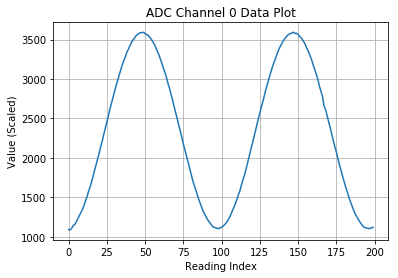

In [8]:
# Call the function to start reading data and plot it
read_pmod_adc()
